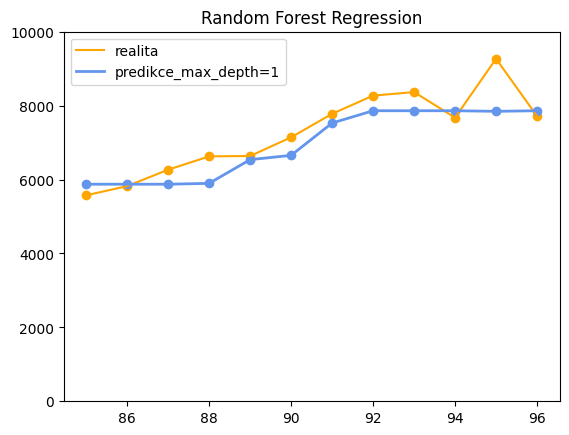

R2: 0.8580905964167131
Root Mean Squared Error: 547.267160539425
CPU times: total: 375 ms
Wall time: 1.22 s


In [4]:
%%time
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-1:])

df_train =df.drop(df.index[-12:])
df_test = df.drop(df.index[:-12])
df_test_graf = df_test

#@ parametry
parametry = ['aktivni-1', 'nove-1', "zbytek-1"]

#>> dataframy
X = df[parametry]
y = df['aktivni']
X_train = df_train[parametry]
y_train =  df_train["aktivni"]
X_test = df_test[parametry]
y_test = df_test['aktivni']
#>> trenink
#?? dalsi args v dokumentaci: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.rfr.html
max_depth = 1
rfr = RandomForestRegressor(max_depth=max_depth)
rfr.fit(X_train, y_train)

#>> evaluace
y_pred = rfr.predict(X_test)

#>> dotrenovani modelu na vsech datech
rfr.fit(X,y)

#>> graf
plt.figure()
plt.scatter(X_test.index, y_test,c="orange")
plt.plot(X_test.index, y_test,c="orange", label="realita")
plt.scatter(X_test.index, y_pred, color="cornflowerblue")
plt.plot(X_test.index, y_pred, color="cornflowerblue", label=f"predikce_max_depth={max_depth}", linewidth=2)
plt.title("Random Forest Regression")
plt.ylim(0,10000)
plt.legend()
plt.show()

#>>metriky.
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = np.sqrt(metrics.r2_score(y_test, y_pred))
print("R2:", r2)
print("Root Mean Squared Error:", rmse)

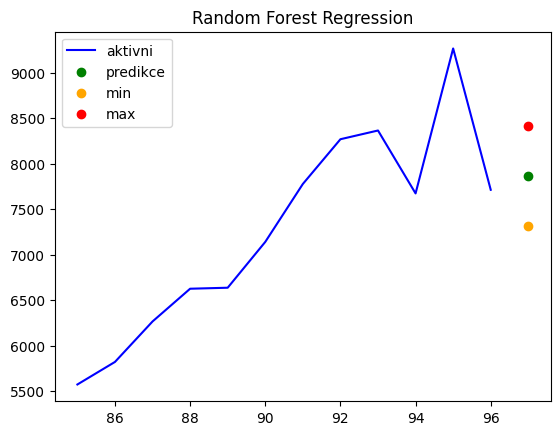


Model:      RandomForestRegressor(max_depth=1)
Min:        7317
Predikce:   7864
Max:        8412
Rmse:       547



In [12]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df_orig = df.drop(df.index[-1:])

#df = (df-df.min())/(df.max()-df.min())
df_new = df.drop(df.index[:-1])
df_train = df.drop(df.index[-12:])

x_new = df_new[parametry]
#>> predikce
y_new_pred = rfr.predict(x_new)
#>> graf
plt.figure()
plt.title("Random Forest Regression")
#* realita
plt.plot(X_test.index, df_test['aktivni'],label="aktivni",color="blue")
#* predikce
plt.scatter(x_new.index, y_new_pred, label='predikce', color="green")
plt.scatter(x_new.index, y_new_pred - rmse, label="min", color="orange")
plt.scatter(x_new.index, y_new_pred + rmse, label="max", color="red")
plt.legend()
plt.show()
#>> print
print(f"""
Model:      {rfr}
Min:        {int(y_new_pred-rmse)}
Predikce:   {int(y_new_pred)}
Max:        {int(y_new_pred+rmse)}
Rmse:       {int(rmse)}
""")